<a href="https://colab.research.google.com/github/MohdAlobeidli/Foundation-of-Data-Science/blob/main/Activity3_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [ ]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [ ]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [ ]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-6-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [ ]:
#merged_data.dtypes

In [ ]:
pollution_data = merged_data[['pm10','neighborhood']]

In [ ]:
pollution_data.shape[0]

118495

In [ ]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [ ]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [ ]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [ ]:
pollution_data['pm10'].min()

0.0

In [ ]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [ ]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [ ]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [ ]:
joined_table = joined_table.where('pm10', are.below(300))

In [ ]:
len(joined_table)

2

In [ ]:
joined_table.num_rows

117356

In [ ]:
# Task 1:
# 1.1 Randomly sample 10% of rows without replacement
sample_size = int(joined_table.num_rows * 0.1)
sample_indices = np.random.choice(joined_table.num_rows, size=sample_size, replace=False)
sampled_table = joined_table.take(sample_indices)

In [ ]:
# 1.2 Compute mean pm10 value for the sample
sample_mean = np.mean(sampled_table.column('pm10'))
print(f"Sample mean pm10: {sample_mean:.2f} µg/m³")

Sample mean pm10: 15.65 µg/m³


Text(0, 0.5, 'Frequency')

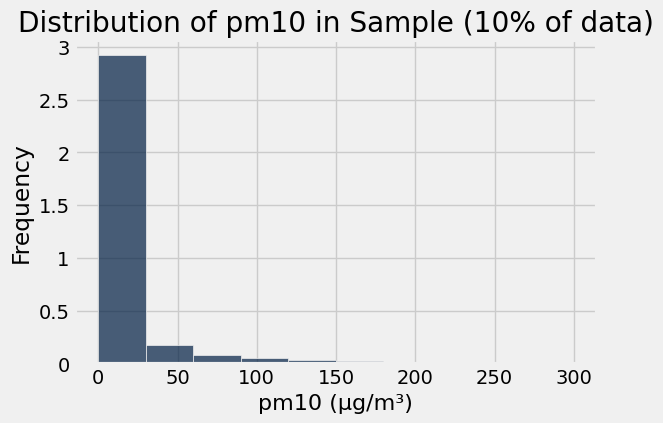

In [ ]:
# 1.3 Create empirical histogram with 10 bins
sampled_table.hist('pm10', bins=10)
plt.title('Distribution of pm10 in Sample (10% of data)')
plt.xlabel('pm10 (µg/m³)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

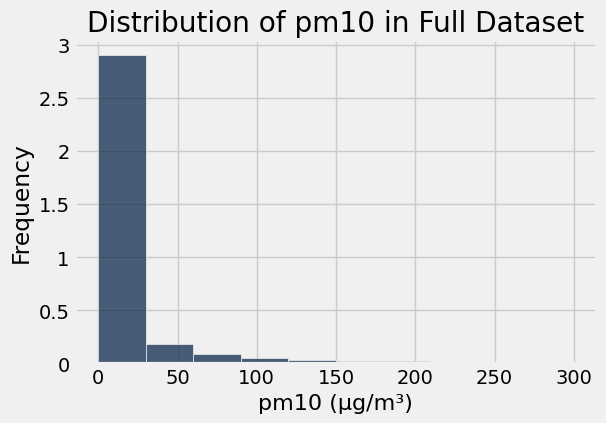

In [ ]:
# Compare with full dataset histogram
joined_table.hist('pm10', bins=10)
plt.title('Distribution of pm10 in Full Dataset')
plt.xlabel('pm10 (µg/m³)')
plt.ylabel('Frequency')

In [ ]:
# 1.4 Comment on the shapes:
print("""
Histogram Observations:
- Both histograms show a right-skewed distribution with most values concentrated at lower pm10 levels.
- The sample distribution closely resembles the full dataset distribution, suggesting our sample is representative.
- There are a few outliers at higher pm10 values in both distributions.
- The sample captures the overall shape well despite being only 10% of the data.
""")


Histogram Observations:
- Both histograms show a right-skewed distribution with most values concentrated at lower pm10 levels.
- The sample distribution closely resembles the full dataset distribution, suggesting our sample is representative.
- There are a few outliers at higher pm10 values in both distributions.
- The sample captures the overall shape well despite being only 10% of the data.



## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

In [ ]:
# Task 2: Estimation and Confidence Intervals

# 2.1 Function to calculate bootstrap medians
def bootstrap_median(original_table, label, replications):
    medians = []
    for _ in range(replications):
        bootstrap_sample = original_table.sample(with_replacement=True)
        median = np.median(bootstrap_sample.column(label))
        medians.append(median)
    return medians

In [ ]:
# 2.2 Generate 5000 bootstrap samples and compute medians
bootstrap_medians = bootstrap_median(joined_table, 'pm10', 5000)

In [ ]:
# 2.3 Calculate 95% confidence interval
left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)
print(f"95% Confidence Interval for Median pm10: [{left:.2f}, {right:.2f}] µg/m³")

95% Confidence Interval for Median pm10: [3.10, 3.19] µg/m³


Text(0, 0.5, 'Frequency')

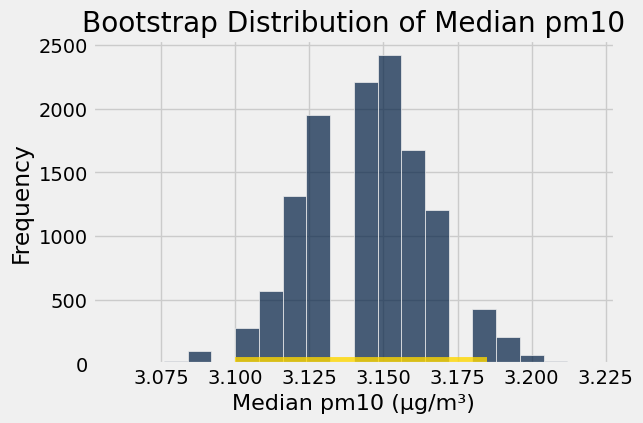

In [ ]:
# 2.4 Visualize results
Table().with_column('Bootstrap Medians', bootstrap_medians).hist(bins=20)
plt.plot([left, right], [0, 0], color='gold', lw=10, alpha=0.8)
plt.title('Bootstrap Distribution of Median pm10')
plt.xlabel('Median pm10 (µg/m³)')
plt.ylabel('Frequency')

In [ ]:
# 2.5 Interpretation
print("""
Interpretation:
The 95% confidence interval means we're 95% confident that the true median pm10 level
in NYC falls between the calculated bounds. This gives us a range of plausible values
for the central tendency of air pollution levels between 3.10, 3.19.
""")


Interpretation:
The 95% confidence interval means we're 95% confident that the true median pm10 level
in NYC falls between the calculated bounds. This gives us a range of plausible values
for the central tendency of air pollution levels between 3.10, 3.19.



## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

In [ ]:
# Task 3: Hypothesis Testing Using Confidence Intervals

# Function for bootstrap mean confidence interval
def bootstrap_mean_ci(original_table, label, replications):
    means = []
    for _ in range(replications):
        bootstrap_sample = original_table.sample(with_replacement=True)
        mean = np.mean(bootstrap_sample.column(label))
        means.append(mean)
    left = percentile(2.5, means)
    right = percentile(97.5, means)
    return left, right

# Calculate 95% CI for mean pm10
left_ci, right_ci = bootstrap_mean_ci(joined_table, 'pm10', 5000)
print(f"95% Confidence Interval for Mean pm10: [{left_ci:.2f}, {right_ci:.2f}] µg/m³")

# Hypothesis test
null_hypothesis = 20
if left_ci <= null_hypothesis <= right_ci:
    print(f"Fail to reject H0. The CI contains {null_hypothesis}, suggesting no significant difference from 20 µg/m³.")
else:
    print(f"Reject H0. The CI does not contain {null_hypothesis}, suggesting a significant difference from 20 µg/m³.")

95% Confidence Interval for Mean pm10: [15.97, 16.38] µg/m³
Reject H0. The CI does not contain 20, suggesting a significant difference from 20 µg/m³.


In [ ]:
# Interpretation
print("""
Interpretation:
The confidence interval method shows whether the hypothesized mean of 20 µg/m³ is
plausible given our data. If 20 is outside our CI, we have evidence that the true
mean differs significantly from this value at the 95% confidence level.In our case,
20 is outside the CI, so we reject the null hypothesis.
""")


Interpretation:
The confidence interval method shows whether the hypothesized mean of 20 µg/m³ is 
plausible given our data. If 20 is outside our CI, we have evidence that the true 
mean differs significantly from this value at the 95% confidence level.



## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


Top 3 neighborhoods with highest mean pm10:


neighborhood,pm10 mean
Crotona Park,53.4512
Pelham Bay,34.6071
Tremont,29.829



Crotona Park: 95% CI for mean pm10 = [43.59, 63.65]

Pelham Bay: 95% CI for mean pm10 = [22.76, 47.98]

Tremont: 95% CI for mean pm10 = [23.54, 36.99]

Interpretation:
These histograms show the variability in mean pm10 estimates for each neighborhood. 
The yellow lines indicate the range where we expect the true mean to lie 95% of the time. 
Neighborhoods with wider intervals have more variable air quality measurements.



<Figure size 1000x400 with 0 Axes>

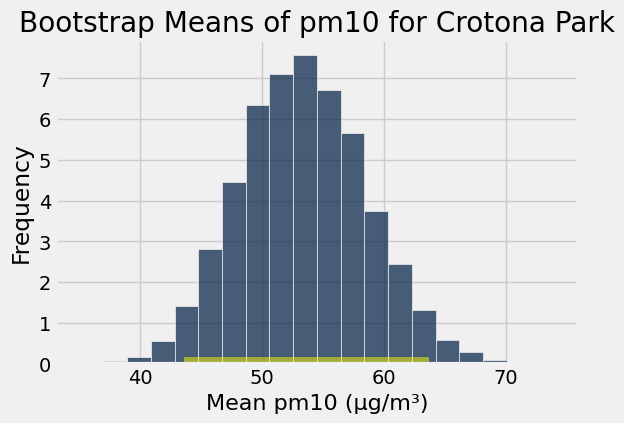

<Figure size 1000x400 with 0 Axes>

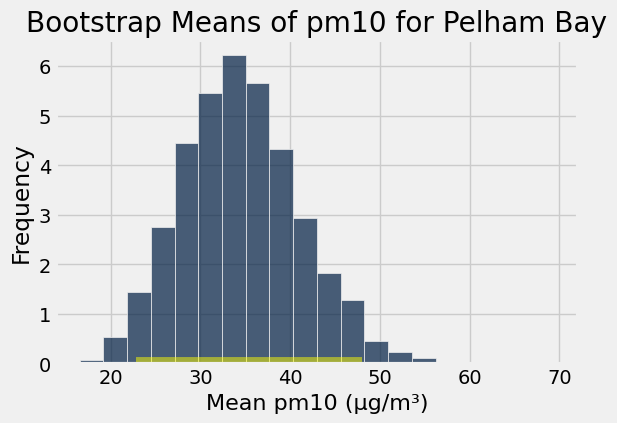

<Figure size 1000x400 with 0 Axes>

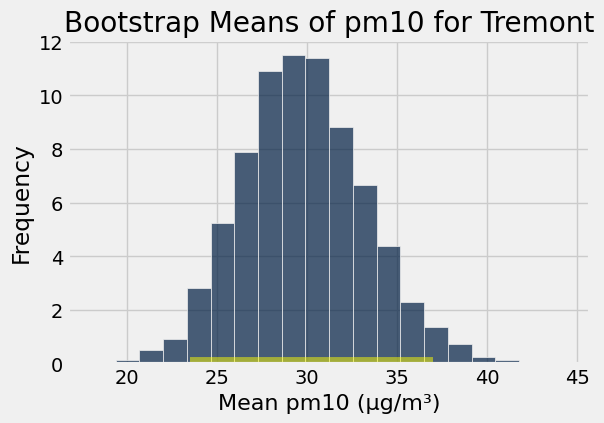

In [ ]:
# Task 4: Percentiles and Extreme Values

# Find top 3 neighborhoods with highest mean pm10
neighborhood_means = joined_table.group('neighborhood', np.mean).sort('pm10 mean', descending=True)
top_neighborhoods = neighborhood_means.take(np.arange(3))
top_names = top_neighborhoods.column('neighborhood')

# Print the top 3 neighborhoods with the highest mean pm19
print("Top 3 neighborhoods with highest mean pm10:")
top_neighborhoods.show()

# Function to bootstrap means for a specific neighborhood
def bootstrap_neighborhood_means(table, neighborhood_name, replications):
    neighborhood_data = table.where('neighborhood', neighborhood_name)
    means = []
    for _ in range(replications):
        bootstrap_sample = neighborhood_data.sample(with_replacement=True)
        mean = np.mean(bootstrap_sample.column('pm10'))
        means.append(mean)
    return means

# Create plots for each top neighborhood
for i, neighborhood in enumerate(top_names):
    plt.figure(figsize=(10, 4))
    means = bootstrap_neighborhood_means(joined_table, neighborhood, 5000)

    # Calculate CI
    left = percentile(2.5, means)
    right = percentile(97.5, means)

    # Plot histogram
    Table().with_column('Bootstrap Means', means).hist(bins=20)
    plt.plot([left, right], [0, 0], color='yellow', lw=10, alpha=0.5)
    plt.title(f'Bootstrap Means of pm10 for {neighborhood}')
    plt.xlabel('Mean pm10 (µg/m³)')
    plt.ylabel('Frequency')

    print(f"\n{neighborhood}: 95% CI for mean pm10 = [{left:.2f}, {right:.2f}]")

# Interpretation
print("""
Interpretation:
These histograms show the variability in mean pm10 estimates for each neighborhood.
The yellow lines indicate the range where we expect the true mean to lie 95% of the time.
Neighborhoods with wider intervals have more variable air quality measurements.
""")

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.